In [3]:
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.2 MB/s eta 0:00:00


In [4]:
import uproot
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

f=uproot.open("/content/drive/MyDrive/B2HHH_MagnetUp.root")


In [5]:
f.keys()

['DecayTree;1']

In [6]:
tree=f["DecayTree"].arrays(library="np")

In [7]:
tree.keys()


dict_keys(['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2', 'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi', 'H3_Charge', 'H3_IPChi2', 'H3_isMuon'])

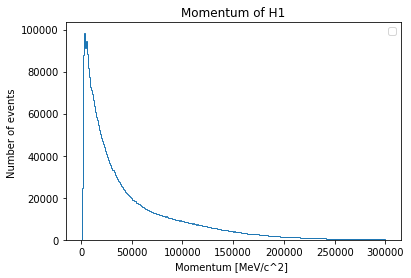

In [18]:
#total momentum of three daugheters
H1_ptot=sqrt(square(tree["H1_PX"])+square(tree["H1_PY"])+square(tree["H1_PZ"])) 
H2_ptot= sqrt(square(tree["H2_PX"])+square(tree["H2_PY"])+square(tree["H2_PZ"]))
H3_ptot= sqrt(square(tree["H3_PX"])+square(tree["H3_PY"])+square(tree["H3_PZ"]))

histName = H1_ptot
bins = 300
range = (0,300000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Momentum of H1")
plt.ylabel("Number of events ")
plt.xlabel("Momentum [MeV/c^2] ")


Text(0.5, 0, 'Momentum [MeV/c^2] ')

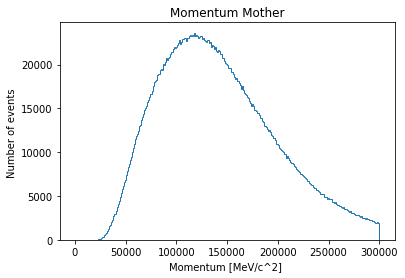

In [19]:
#total momentum mother
ptot_mother=sqrt((square(tree["H1_PX"]+tree["H2_PX"]+tree["H3_PX"]) + square(tree["H1_PY"]+tree["H2_PY"]+tree["H3_PY"]) + square(tree["H1_PZ"]+tree["H2_PZ"]+tree["H3_PZ"])))

histName = ptot_mother
bins = 300
range = (0,300000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Momentum Mother")
plt.ylabel("Number of events ")
plt.xlabel("Momentum [MeV/c^2] ")


Text(0.5, 0, 'Mass [MeV/c^2] ')

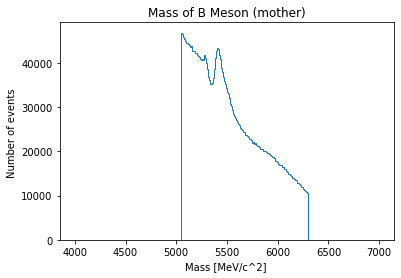

In [21]:
#plot a histogram of the range of masses of the B meson (mass mother)
mkaon = 493.677
E1 = sqrt(square(H1_ptot)+mkaon**2)
E2 = sqrt(square(H2_ptot)+mkaon**2)
E3 = sqrt(square(H3_ptot)+mkaon**2)
M_mother = sqrt(square(E1+E2+E3)-square(ptot_mother))

histName = M_mother
bins = 300
range = (4000, 7000)

plt.hist(histName,bins,range,histtype='step');

plt.title("Mass of B Meson (mother)")
plt.ylabel("Number of events ")
plt.xlabel("Mass [MeV/c^2] ")

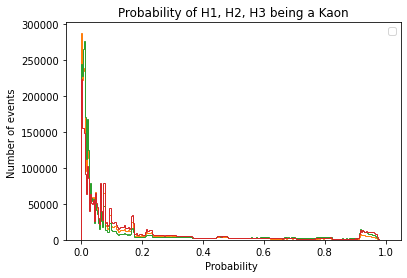

In [23]:
#probability Kaon
bins = 300
range = (0,1)

plt.hist(histName,bins,range,histtype='step');
plt.hist(tree["H1_ProbK"],bins,range,histtype='step');
plt.hist(tree["H2_ProbK"],bins,range,histtype='step');
plt.hist(tree["H3_ProbK"],bins,range,histtype='step');

plt.title("Probability of H1, H2, H3 being a Kaon")
plt.ylabel("Number of events ")
plt.xlabel("Probability ")
#LEGEND!!!!

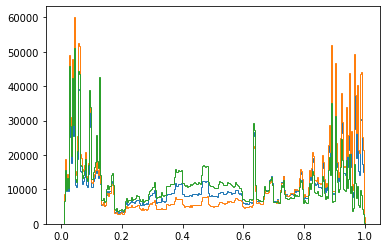

In [12]:
#probability Pion
bins = 300
range = (0,1)

plt.hist(tree["H1_ProbPi"],bins,range,histtype='step');
plt.hist(tree["H2_ProbPi"],bins,range,histtype='step');
plt.hist(tree["H3_ProbPi"],bins,range,histtype='step');

plt.title("Probability of H1, H2, H3 being a Pion")
plt.ylabel("Number of events ")
plt.xlabel("Probability ")

Text(0.5, 0, 'Chi2 ')

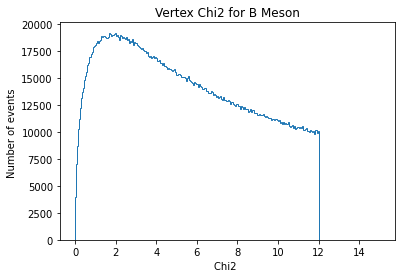

In [24]:
#plot of the B_VertexChi2
bins = 300
range = (0,15)

plt.hist(tree["B_VertexChi2"],bins,range,histtype='step');

plt.title("Vertex Chi2 for B Meson")
plt.ylabel("Number of events ")
plt.xlabel("Chi2 ")


In [14]:
#selecting probability Kaon (since the mass we've been working so far is from Kaon), low prob of being a Pion
selection=("(H1_ProbK>0.5)&(H2_ProbK>0.5)&(H3_ProbK>0.5)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(H1_ProbPi<0.3)&(H2_ProbPi<0.3)&(H1_ProbPi<0.3)")
cuttree=f["DecayTree"].arrays(library="np",cut=selection)

Text(0.5, 0, 'Mass [MeV/c^2] ')

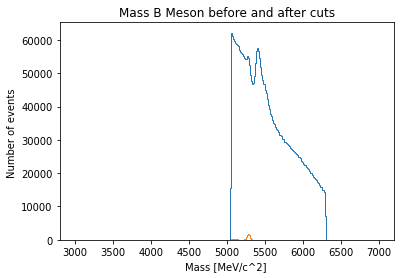

In [25]:
#post-cuts
H1_ptot_post=sqrt(square(cuttree["H1_PX"])+square(cuttree["H1_PY"])+square(cuttree["H1_PZ"]))
H2_ptot_post= sqrt(square(cuttree["H2_PX"])+square(cuttree["H2_PY"])+square(cuttree["H2_PZ"]))
H3_ptot_post= sqrt(square(cuttree["H3_PX"])+square(cuttree["H3_PY"])+square(cuttree["H3_PZ"]))

E1_post=sqrt(square(H1_ptot_post)+mkaon**2)
E2_post=sqrt(square(H2_ptot_post)+mkaon**2)
E3_post=sqrt(square(H3_ptot_post)+mkaon**2)
ptot_mother_post= sqrt((square(cuttree["H1_PX"]+cuttree["H2_PX"]+cuttree["H3_PX"]) + square(cuttree["H1_PY"]+cuttree["H2_PY"]+cuttree["H3_PY"]) + square(cuttree["H1_PZ"]+cuttree["H2_PZ"]+cuttree["H3_PZ"])))
M_mother_post=sqrt(square(E1_post+E2_post+E3_post)-square(ptot_mother_post))

#plotting pre-cuts and post-cuts
bins = 300
range = (3000,7000)
plt.hist(M_mother,bins,range,histtype='step'); #mother pre_cut was kept as M_mother 
plt.hist(M_mother_post,bins,range,histtype='step');

plt.title("Mass B Meson before and after cuts")
plt.ylabel("Number of events ")
plt.xlabel("Mass [MeV/c^2] ")
